# S-03_analisis_negocio_Marketing

## Librerías

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker # per poder utilitzar FuncFormatter i aplicar format a la barra
import geopandas as gpd
import time
import folium
import os
import re
from mysql.connector import errorcode
from dotenv import load_dotenv # type: ignore # per dades accedir base dades
from datetime import datetime
from matplotlib.ticker import FuncFormatter # per poder utilitzar el separador de milersimport geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import Point
from geopy.exc import GeocoderTimedOut
from folium.plugins import MarkerCluster
from tabulate import tabulate # para formato de una tabla
from scipy.stats import skew
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import cosine_similarity
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer

#Librería para gráficos interactivos en python
import plotly.graph_objects as go
import plotly.express as px

#Librería test de hipótesis
from scipy.stats import ttest_ind
from scipy import stats


## Utilizar el fichero CSV

In [2]:

# Ruta relativa al fitxer dins del repositori Git
csv_path = "../Data/2025_04_28_Sprint03.csv"

try:
    # Carregar el CSV com a DataFrame
    df = pd.read_csv(csv_path)
    print(f"Arxiu carregat correctament: {csv_path}")
    
    # Diccionari per simular múltiples DataFrames si cal
    DataFrames = {"df2025_04_28_Sprint03": df}
    print(DataFrames.keys())
    
    # Opcional: exposar el DataFrame com a variable local
    locals().update(DataFrames)

except FileNotFoundError:
    print(f"No s'ha trobat l'arxiu: {csv_path}")
except Exception as e:
    print(f"S'ha produït un error en llegir el CSV: {e}")

Arxiu carregat correctament: ../Data/2025_04_28_Sprint03.csv
dict_keys(['df2025_04_28_Sprint03'])


## Visualización df

In [3]:
df


,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,reviews_per_month,country,city,insert_date,amenities_normalized,days_occupied,occupancy_rate,supera_80,amenities_count,normalized_amenities
0,15248525,"appt dans villa � Llansa ,beau jardin,terrasse",Mon logement est proche de la plage et des com...,84213236,Llan��,NaN,Entire home/apt,6,1.0,2.0,...,66.0,spain,girona,2021-02-27,"air conditioning, balcony, bathroom essentials...",0,0.000000,True,27,"childrenu2019s books and toys, cleaning before..."
1,44391173,Hostal Escadarcs 1780,"Peque�o hostal construido de 1780, situado en ...",358199210,Fontanals de Cerdanya,NaN,Private room,16,0.0,2.0,...,NaN,spain,girona,2021-02-27,"air conditioning, bathroom essentials, bathroo...",0,0.000000,False,10,"essentials, fire extinguisher, hair dryer, han..."
2,32088176,"Two-level apartment, wifi, terrace, swimming pool","Authentic 2 level apartment, located on the su...",240662122,Lloret de Mar,NaN,Entire home/apt,4,1.0,1.0,...,57.0,spain,girona,2021-02-27,"24-hour check-in, balcony, bathroom essentials...",30,100.000000,True,29,"coffee maker, cooking basics, dedicated worksp..."
3,45803831,Villa Solecito at Illes Balears,Villa Solecito provides a most comfortable and...,345010290,Mah�n,NaN,Entire home/apt,12,6.0,6.0,...,NaN,spain,menorca,2021-02-27,"air conditioning, bathroom essentials, bathroo...",29,96.666667,False,22,"air conditioning, bed linens, cable tv, coffee..."
4,43993521,"Apartment Sant Lluis,2 minutes walk from the b...",Apartments located in the central part of Llor...,59318446,Lloret de Mar,NaN,Entire home/apt,6,1.0,2.0,...,29.0,spain,girona,2021-02-27,"air conditioning, bathroom essentials, bathroo...",3,10.000000,True,23,"air conditioning, bed linens, carbon monoxide ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9645,13707226,"Remarkable Value, Unbeatable Location",A spacious double bedroom with a balcony. It's...,80008404,el Barri G�tic,Ciutat Vella,Private room,2,4.0,1.0,...,25.0,spain,barcelona,2017-01-04,"air conditioning, bathroom essentials, bathroo...",0,0.000000,True,20,"air conditioning, buzzer/wireless intercom, dr..."
9646,15713525,Nice room in classic eixample flat with balcony,"Lugares de inter�s: Cervecer�a Catalana, Casa ...",3297768,l'Antiga Esquerra de l'Eixample,Eixample,Private room,1,2.0,1.0,...,52.0,spain,barcelona,2017-01-04,"bathroom essentials, bathroom extras, dining a...",30,100.000000,True,18,"breakfast, carbon monoxide detector, dryer, el..."
9647,544995,LUXURY HOUSE IN BCN NEAR THE BEACH,SPECIAL OFFER! LUXURY HOUSE IN BCN NEAR THE BE...,2556699,la Vila Ol�mpica del Poblenou,Sant Mart�,Entire home/apt,6,3.0,3.0,...,39.0,spain,barcelona,2017-01-04,"24-hour check-in, air conditioning, bathroom e...",0,0.000000,True,20,"24-hour check-in, air conditioning, buzzer/wir..."
9648,1346199,Duplex Loft near Beach - Groups Offer,Large loft 110m� fully renovated and furnished...,6614322,el Parc i la Llacuna del Poblenou,Sant Mart�,Entire home/apt,10,1.0,2.0,...,NaN,spain,barcelona,2017-01-04,"elevator, family friendly, internet, kitchen, ...",0,0.000000,False,5,"elevator in building, family/kid friendly, kit..."


## Descripción

In [4]:
df.describe()

,apartment_id,host_id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_occupied,occupancy_rate,amenities_count
count,9.650000e+03,9.650000e+03,9650.000000,9584.000000,9583.000000,9605.000000,9650.000000,9650.000000,9650.000000,9650.000000,...,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,7103.000000,9650.000000,9650.000000,9650.000000
mean,2.122473e+07,9.097918e+07,4.266943,1.593176,1.936137,2.922853,1035.132746,4.966839,759.591710,12.998031,...,94.429114,93.109954,96.197381,96.172040,95.392088,91.351542,123.703224,17.001969,56.673230,21.123109
std,1.161793e+07,8.717279e+07,2.589438,0.989921,1.376250,2.269252,953.530927,17.986249,498.500306,11.824935,...,9.429369,9.956263,8.212464,8.296275,7.670736,9.935197,153.172140,11.824935,39.416451,10.644598
min,1.196400e+04,1.070400e+04,1.000000,0.000000,0.000000,0.000000,60.000000,1.000000,1.000000,0.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,0.000000,0.000000,1.000000
25%,1.332096e+07,1.506455e+07,2.000000,1.000000,1.000000,1.000000,450.000000,1.000000,62.000000,0.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,18.000000,4.000000,13.333333,13.000000
50%,2.065612e+07,6.569780e+07,4.000000,1.000000,2.000000,2.000000,750.000000,2.000000,1125.000000,11.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,58.000000,19.000000,63.333333,19.000000
75%,3.016933e+07,1.429782e+08,6.000000,2.000000,3.000000,4.000000,1250.000000,4.000000,1125.000000,26.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,177.000000,30.000000,100.000000,27.000000
max,4.806155e+07,3.874783e+08,29.000000,13.000000,50.000000,30.000000,28571.000000,1125.000000,1125.000000,30.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1291.000000,30.000000,100.000000,99.000000


## Ver columnas con más valores nulos

In [5]:
print(df.isnull().sum().sort_values(ascending=False).head(10))


neighbourhood_district         3790
review_scores_cleanliness      2547
review_scores_checkin          2547
review_scores_communication    2547
review_scores_location         2547
review_scores_value            2547
review_scores_rating           2547
first_review_date              2547
review_scores_accuracy         2547
reviews_per_month              2547
dtype: int64


## Prengunta de negocio Sprint-3 Marketing
    Analista de Màrqueting i Estratègia Comercial: Quines ciutat i barris presenten un potencial d'optimització més gran considerant les ressenyes, la puntuació de la zona i la disponibilitat mínima/màxima de nits?

### Interpretar la pregunta
    Objetivo: Identificar ciudades y barrios con mayor potencial de optimización.
    
    Criterios considerados:
        Ressenyes (número y/o frecuencia)
        Puntuació de la zona (si está en el dataset, o debes calcularla/estimar)
        Disponibilitat mínima i màxima de nits (nights minimum / maximum)
    Optimización = posibilidad de mejora, por lo tanto:
        Lugares con alta demanda (muchas reseñas) pero restricciones subóptimas (por ejemplo, estancias mínimas largas que podrían reducir ocupación)
        Lugares con baja ocupación pero buena puntuación de zona (potencial mal aprovechado)    

## Preparar los datos
    Filtrar columnas clave: city, neighbourhood_name, reviews_per_month, occupancy_rate, minimum_nights, maximum_nights.
    Limpiar NaN o valores extremos

In [6]:
df_filtered = df[[
    'city', 'neighbourhood_name', 'reviews_per_month',
    'occupancy_rate', 'minimum_nights', 'maximum_nights'
]].dropna()

In [7]:
df_filtered.head(10)

,city,neighbourhood_name,reviews_per_month,occupancy_rate,minimum_nights,maximum_nights
0,girona,Llan��,66.0,0.000000,2,1125
2,girona,Lloret de Mar,57.0,100.000000,6,62
4,girona,Lloret de Mar,29.0,10.000000,1,50
6,girona,Llan��,28.0,100.000000,6,20
9,girona,Castell-Platja d'Aro,101.0,3.333333,2,1125
10,girona,Blanes,25.0,3.333333,5,85
11,malaga,Centro,245.0,100.000000,1,1125
12,sevilla,Santa Cruz,11.0,10.000000,1,1125
14,girona,L'Escala,55.0,100.000000,2,1125
15,menorca,Ciutadella de Menorca,3.0,3.333333,7,1125


## Segunda preparación de los datos
    Filtrar columnas clave: city, neighbourhood_name, review_scores_rating, review_scores_location, occupancy_rate, minimum_nights, maximum_nights.
    Limpiar NaN o valores extremos

In [8]:
df_filtered_2 = df[[
    'city', 'neighbourhood_name', 'reviews_per_month', 'review_scores_rating', 
    'review_scores_location', 'occupancy_rate', 'minimum_nights', 'maximum_nights']].dropna()

df_filtered_2.head(10)

,city,neighbourhood_name,reviews_per_month,review_scores_rating,review_scores_location,occupancy_rate,minimum_nights,maximum_nights
0,girona,Llan��,66.0,960.0,100.0,0.000000,2,1125
2,girona,Lloret de Mar,57.0,970.0,100.0,100.000000,6,62
4,girona,Lloret de Mar,29.0,1000.0,100.0,10.000000,1,50
6,girona,Llan��,28.0,900.0,100.0,100.000000,6,20
9,girona,Castell-Platja d'Aro,101.0,940.0,100.0,3.333333,2,1125
10,girona,Blanes,25.0,960.0,90.0,3.333333,5,85
11,malaga,Centro,245.0,920.0,100.0,100.000000,1,1125
12,sevilla,Santa Cruz,11.0,930.0,100.0,10.000000,1,1125
14,girona,L'Escala,55.0,930.0,100.0,100.000000,2,1125
15,menorca,Ciutadella de Menorca,3.0,920.0,100.0,3.333333,7,1125


## Posible métrica de "potencial de optimización"
✅ Ventajas:
* Fácil de interpretar.
* Detecta propiedades con baja ocupación pero que reciben cierto tráfico (reseñas), y penaliza las estancias mínimas largas.

❌ Limitaciones:
* No tiene en cuenta la ubicación ni la calidad percibida del alojamiento.
* Puede dar puntajes altos a propiedades en zonas malas o ya saturadas, simplemente por tener muchas reseñas.

In [53]:
df_filtered['optimization_score'] = ((1 - df_filtered['occupancy_rate']) * df_filtered['reviews_per_month']) / (df_filtered['minimum_nights'] + 1)

df_filtered['optimization_score'].head(10)

0        22.000000
2      -806.142857
4      -130.500000
6      -396.000000
9       -78.555556
10       -9.722222
11   -12127.500000
12      -49.500000
14    -1815.000000
15       -0.875000
Name: optimization_score, dtype: float64

## Posible segunda métrica de "potencial de optimización"
✅ Ventajas:
* Incluye contexto de la zona (review_scores_location): detecta si la ubicación es buena.
* Considera la calidad general del alojamiento con review_scores_rating.
* Mejor equilibrio entre oferta y demanda: se penaliza si el alojamiento tiene mala reputación o está en una zona poco atractiva.
* Más alineado con un modelo de priorización estratégica real.

❌ Desventajas:
* Más complejo y requiere más limpieza de datos (asegurar que review_scores_rating y location no tengan nulos).
* Los valores extremos (muy bajos en rating) pueden sesgar el resultado si no se normaliza.

In [ ]:
df_filtered_2['optimization_score'] = ((1 - df_filtered_2['occupancy_rate']) * df_filtered_2['reviews_per_month'] * df_filtered_2['review_scores_location'] * 
                                       (10 - df_filtered_2['review_scores_rating'])) / (df_filtered_2['minimum_nights'] + 1)

df_filtered_2['optimization_score'].head(10)

0    -2.090000e+06
2     7.738971e+07
4     1.291950e+07
6     3.524400e+07
9     7.305667e+06
10    8.312500e+05
11    1.103602e+09
12    4.554000e+06
14    1.669800e+08
15    7.962500e+04
Name: optimization_score, dtype: float64

In [62]:
# Para normalizar el score entre 0 y 1 manteniendo las proporciones relativas y hacer los números comparables entre barrios.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_filtered_2['optimization_score_scaled'] = scaler.fit_transform(
    df_filtered_2[['optimization_score']])

df_filtered_2['optimization_score_scaled'].head(10)

0     0.008296
2     0.026132
4     0.011665
6     0.016674
9     0.010405
10    0.008952
11    0.256422
12    0.009787
14    0.046237
15    0.008783
Name: optimization_score_scaled, dtype: float64

## Agrupar por ciudad y barrio

In [44]:
agg_df = df_filtered.groupby(['city', 'neighbourhood_name']).agg({'optimization_score': 'mean'}).sort_values(by='optimization_score', ascending=False)

agg_df

optimization_score
city     neighbourhood_name                                         
madrid   Los Rosales                                          132.00
valencia SANT LLORENS                                          77.50
mallorca Santa Mar�a del Cam�                                  32.00
girona   Riells i Viabrea                                      30.33
         Palau de Santa Eul�lia                                22.50
...                                                              ...
madrid   Casco Hist�rico de Barajas                        -14974.61
sevilla  Doctor Barraquer, G. Renfe, Policl�nico           -17829.58
         San Jos� Obrero                                   -22383.50
madrid   Tim�n                                             -31740.17
         Butarque                                          -35588.00

[487 rows x 1 columns]

## Segunda agrupación por ciudad y barrio

In [63]:
agg_df_2 = df_filtered_2.groupby(['city', 'neighbourhood_name'])['optimization_score_scaled'].mean().reset_index().sort_values(by='optimization_score_scaled', ascending=False)

agg_df_2

,city,neighbourhood_name,optimization_score_scaled
203,madrid,Butarque,0.698774
285,madrid,Tim�n,0.671179
405,sevilla,San Jos� Obrero,0.415630
375,sevilla,"Doctor Barraquer, G. Renfe, Policl�nico",0.343657
208,madrid,Casco Hist�rico de Barajas,0.327999
...,...,...,...
1,barcelona,Can Peguera,0.008293
145,girona,Riells i Viabrea,0.008183
348,mallorca,Santa Mar�a del Cam�,0.008098
479,valencia,SANT LLORENS,0.007310


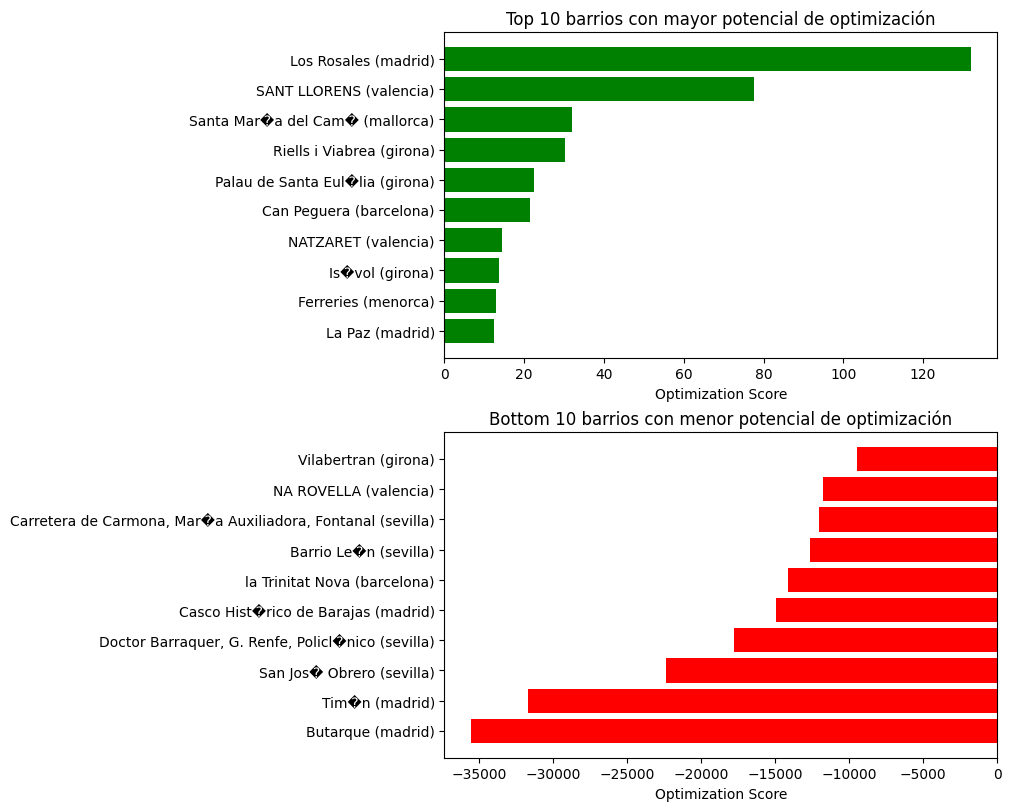

In [13]:
# Resetear el índice para acceder a las columnas como datos
agg_df_reset = agg_df.reset_index()

# Top 10 y Bottom 10
top10 = agg_df_reset.head(10)
bottom10 = agg_df_reset.tail(10)

# Gráfico
fig, ax = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)

# Top 10
ax[0].barh(top10['neighbourhood_name'] + " (" + top10['city'] + ")", top10['optimization_score'], color='green')
ax[0].set_title('Top 10 barrios con mayor potencial de optimización')
ax[0].invert_yaxis()
ax[0].set_xlabel('Optimization Score')

# Bottom 10
ax[1].barh(bottom10['neighbourhood_name'] + " (" + bottom10['city'] + ")", bottom10['optimization_score'], color='red')
ax[1].set_title('Bottom 10 barrios con menor potencial de optimización')
ax[1].invert_yaxis()
ax[1].set_xlabel('Optimization Score')

plt.show()


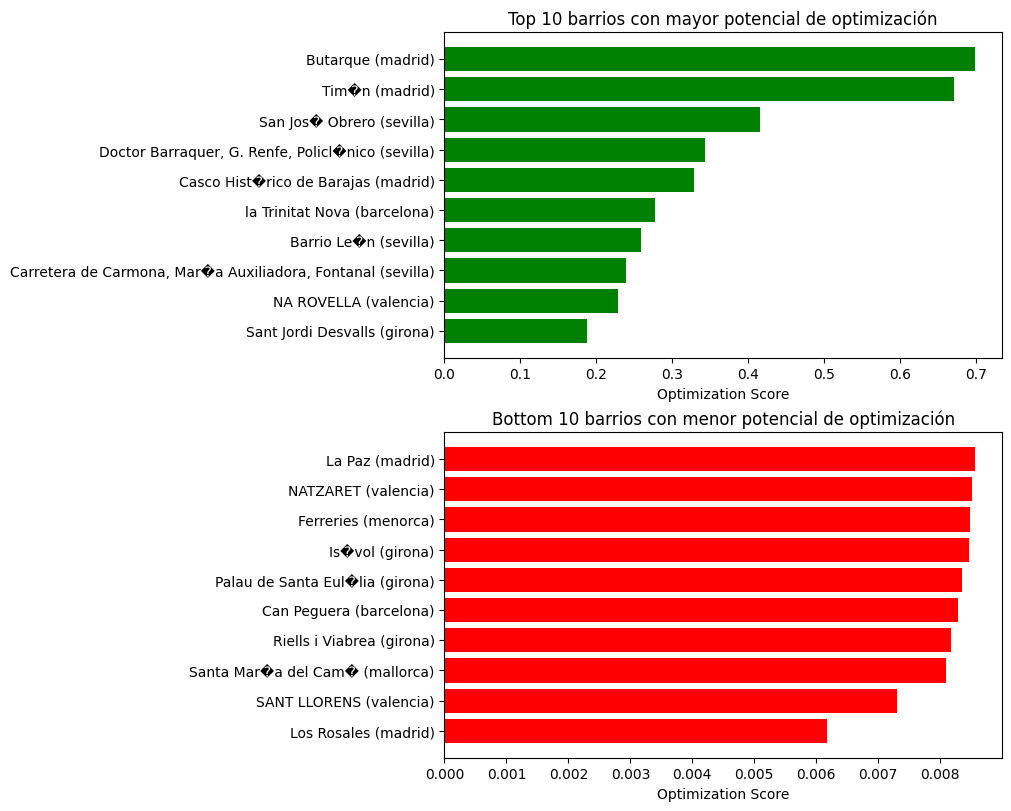

In [64]:
# Resetear el índice para acceder a las columnas como datos
agg_df_reset_2 = agg_df_2.reset_index()

# Top 10 y Bottom 10
top10 = agg_df_reset_2.head(10)
bottom10 = agg_df_reset_2.tail(10)

# Gráfico
fig, ax = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True)

# Top 10
ax[0].barh(top10['neighbourhood_name'] + " (" + top10['city'] + ")", top10['optimization_score_scaled'], color='green')
ax[0].set_title('Top 10 barrios con mayor potencial de optimización')
ax[0].invert_yaxis()
ax[0].set_xlabel('Optimization Score')

# Bottom 10
ax[1].barh(bottom10['neighbourhood_name'] + " (" + bottom10['city'] + ")", bottom10['optimization_score_scaled'], color='red')
ax[1].set_title('Bottom 10 barrios con menor potencial de optimización')
ax[1].invert_yaxis()
ax[1].set_xlabel('Optimization Score')

plt.show()

## Test de hipótesis
    Objetivo:
        Hipótesis nula (H₀): No hay diferencia significativa en la media del optimization_score entre dos grupos de barrios.
        Hipótesis alternativa (H₁): Sí hay una diferencia significativa.

### Comparar top barrios vs bottom barrios

In [15]:
# Convertir agg_df a formato con índice explícito
agg_df_reset = agg_df.reset_index()

# Top y bottom 10
top10 = agg_df_reset.head(10)['optimization_score']
bottom10 = agg_df_reset.tail(10)['optimization_score']

# Test de hipótesis (Welch t-test, que no asume varianzas iguales)
stat, p_value = ttest_ind(top10, bottom10, equal_var=False)

print(f"Estadístico t: {stat:.3f}")
print(f"P-valor: {p_value:.5f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("✅ Rechazamos la hipótesis nula: hay diferencia significativa.")
else:
    print("❌ No se puede rechazar la hipótesis nula: no hay diferencia significativa.")


Estadístico t: 6.487
P-valor: 0.00011
✅ Rechazamos la hipótesis nula: hay diferencia significativa.


In [66]:
# Convertir agg_df a formato con índice explícito
agg_df_reset_2 = agg_df_2.reset_index()

# Top y bottom 10
top10 = agg_df_reset_2.head(10)['optimization_score_scaled']
bottom10 = agg_df_reset_2.tail(10)['optimization_score_scaled']

# Test de hipótesis (Welch t-test, que no asume varianzas iguales)
stat, p_value = ttest_ind(top10, bottom10, equal_var=False)

print(f"Estadístico t: {stat:.3f}")
print(f"P-valor: {p_value:.5f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("✅ Rechazamos la hipótesis nula: hay diferencia significativa.")
else:
    print("❌ No se puede rechazar la hipótesis nula: no hay diferencia significativa.")


Estadístico t: 6.236
P-valor: 0.00015
✅ Rechazamos la hipótesis nula: hay diferencia significativa.


# OPCION 2: FORMA ALTERNATIVA DE DAR RESPUESTA A LA PREGUNTA DE NEGOCIO

## Cálculo de métricas agregadas por ciudad y barrio

In [17]:
df_grouped = df.groupby(['city', 'neighbourhood_name']).agg({
    'number_of_reviews': 'mean',
    'review_scores_rating': 'mean',
    'review_scores_location': 'mean',
    'minimum_nights': 'mean',
    'maximum_nights': 'mean',
    'availability_365': 'mean',
    'occupancy_rate': 'mean',
    'apartment_id': 'count'  # para saber cuántos alojamientos hay en cada barrio
}).reset_index().rename(columns={'apartment_id': 'num_apartments'})

## Definir el índice de potencial de optimización

In [18]:
df_grouped['optimizacion_potencial'] = (
    df_grouped['review_scores_location'] * 0.4 +
    df_grouped['review_scores_rating'] * 0.3 +
    df_grouped['occupancy_rate'] * 0.2 -
    df_grouped['minimum_nights'] * 0.05 -
    df_grouped['maximum_nights'] * 0.05
)


## Visualización

C:\Users\alope\AppData\Local\Temp\ipykernel_7264\3566016126.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_barrios, y='zona', x='optimizacion_potencial', palette='viridis')


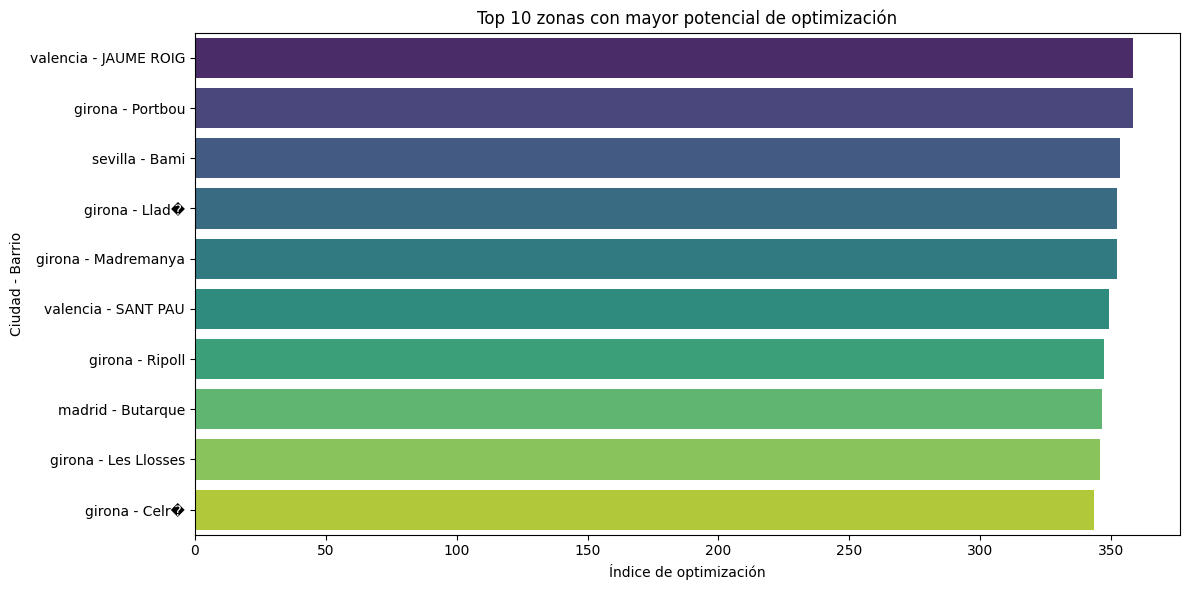

In [19]:
# Ordenamos por mayor potencial de optimización
top_barrios = df_grouped.sort_values('optimizacion_potencial', ascending=False).head(10)

# Creamos una nueva columna para mostrar ciudad y barrio juntos
top_barrios['zona'] = top_barrios['city'] + ' - ' + top_barrios['neighbourhood_name']

# Visualización con Seaborn (más estética)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_barrios, y='zona', x='optimizacion_potencial', palette='viridis')
plt.title('Top 10 zonas con mayor potencial de optimización')
plt.xlabel('Índice de optimización')
plt.ylabel('Ciudad - Barrio')
plt.tight_layout()
plt.show()


## Boxplot por ciudad

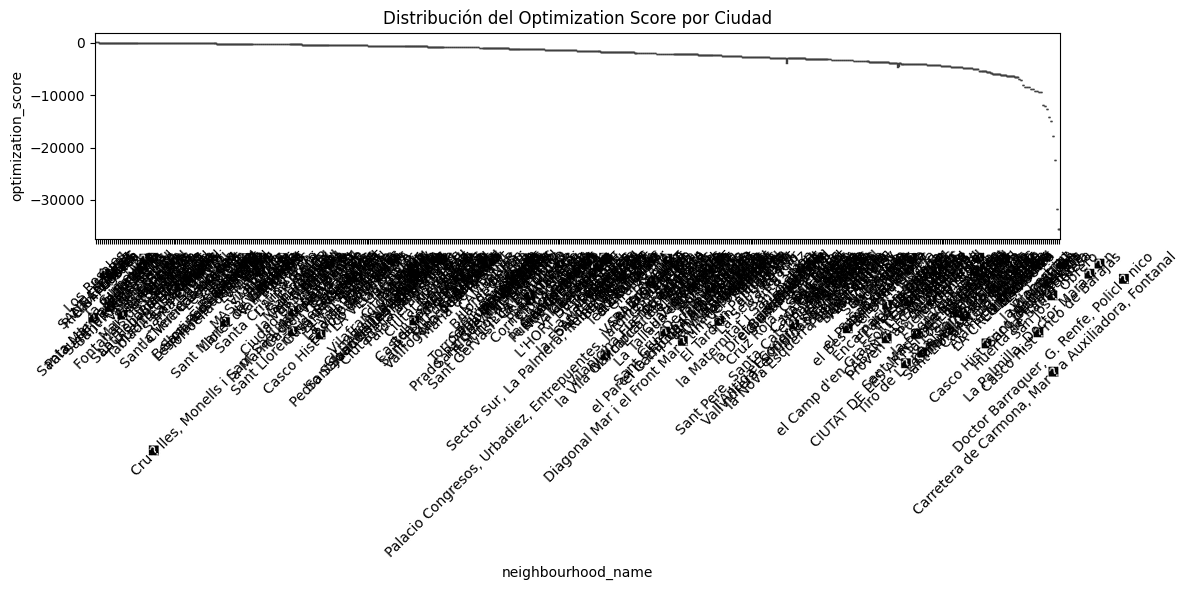

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=agg_df, x='neighbourhood_name', y='optimization_score')
plt.title('Distribución del Optimization Score por Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Violin plot

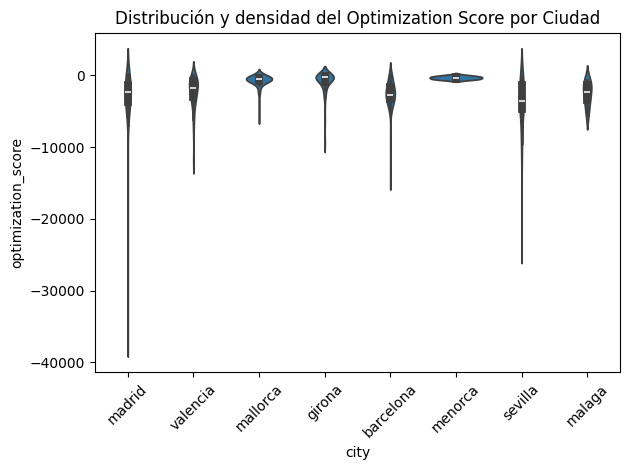

In [21]:
sns.violinplot(data=agg_df, x='city', y='optimization_score')
plt.title('Distribución y densidad del Optimization Score por Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Lollipop chart

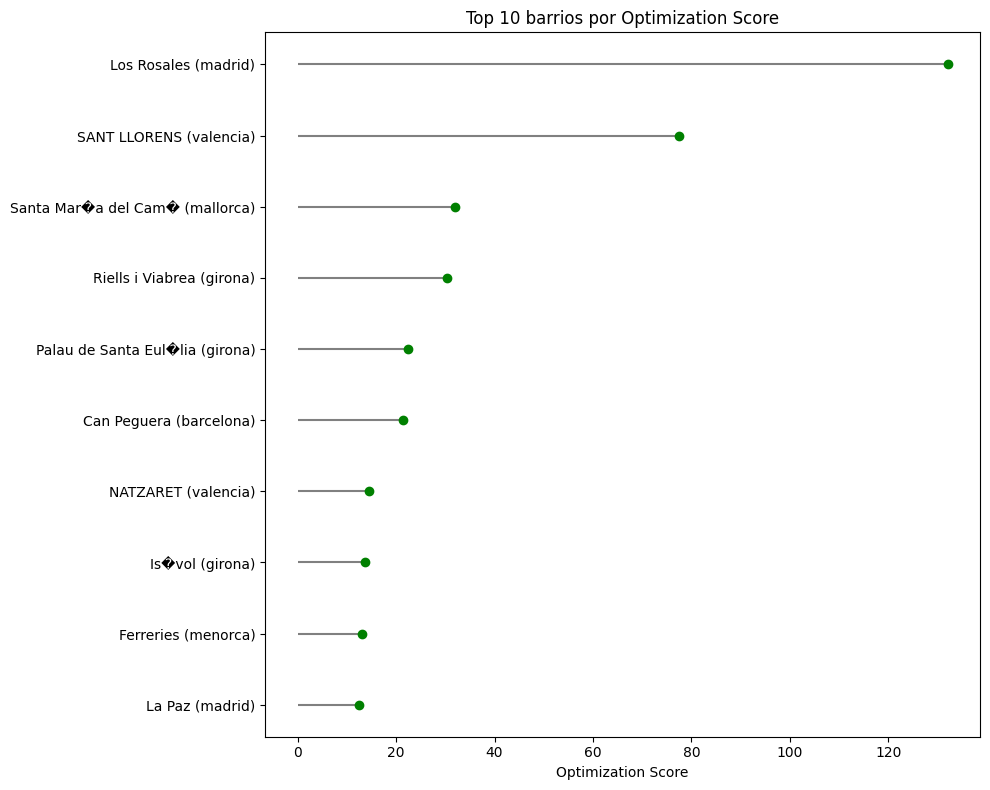

In [22]:
# Asegúrate de resetear el índice si tienes un MultiIndex
agg_df = agg_df.reset_index()

# Ordenar y seleccionar los 10 mejores
sorted_df = agg_df.sort_values('optimization_score', ascending=False).head(10)

# Crear la etiqueta compuesta
sorted_df['label'] = sorted_df['neighbourhood_name'] + " (" + sorted_df['city'] + ")"

# Plot tipo lollipop
plt.figure(figsize=(10, 8))
plt.hlines(y=sorted_df['label'], xmin=0, xmax=sorted_df['optimization_score'], color='gray')
plt.plot(sorted_df['optimization_score'], sorted_df['label'], "o", color='green')
plt.title('Top 10 barrios por Optimization Score')
plt.xlabel('Optimization Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
